# Análise Exploratória de Dados

### Introdução

Análise de um recorte de dados de imóveis na cidade de São Paulo onde os preços vão até 2000R$

## Dataset
- Fonte : https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent


## Informações sobre os dados

- Colunas
    - city: Nome da cidade onde os dados foram obtidos
    - area: Área em m² do imóvel 
    - rooms: Número de Quartos
    - bathroom:Número de Banheiros
    - parking spaces: Quantidade de garagens
    - floor: Andar do imovel
    - animal: Aceita Animais domesticos?
    - furniture: Imóvel Imobiliado?
    - hoa (R\$): Valor do condomínio
    - rent amount (R\$): Valor do Aluguel
    - property tax (R\$): Valor do IPTU
    - fire insurance (R\$): Valor do Seguro de Incêndio
    - total (R\$): Valor total de aluguel do imóvel

## Objetivos
- Os dados apresentam dados de outras cidades além de São Paulo (Rio de Janeiro, Campinas, Porto Alegre), o objetivo é fazer um recorte especifico da cidade de são Paulo com alugueis abaixo ou igual a 2000R$ e Análisar os dados

## Perguntas
- Permitir Animais de estimação aumenta o preço do aluguel?
- Permitir Animais de estimação tem relação com o tamanho do imóvel?

In [69]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import ttest_ind

In [70]:
# carregar base de dados
precoAluguelImoveisSP_df = pd.read_csv('./dados_preço_aluguel_BR.csv', sep=',')

In [71]:
precoAluguelImoveisSP_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


## Pré Processamento

In [72]:
precoAluguelImoveisSP_df.shape

(10692, 13)

Existe 10692 dados, levando em conta todos os alugueis de todas as cidades, primeiro será feito o recorte que se quer análisar

### Filtrar os dados de São Paulo que vão até 2000R$

In [73]:
# Pegar apenas dados da cidade de São Paulo
selecao = (precoAluguelImoveisSP_df['city'] == 'São Paulo') & (precoAluguelImoveisSP_df['total (R$)'] <= 2000)

precoAluguelImoveisSP_df = precoAluguelImoveisSP_df[selecao]
precoAluguelImoveisSP_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
23,São Paulo,35,1,1,0,-,acept,not furnished,0,1100,3,14,1117
38,São Paulo,70,2,1,0,-,not acept,not furnished,0,1150,59,18,1227
53,São Paulo,60,2,1,0,2,acept,not furnished,200,1445,0,19,1664
71,São Paulo,45,1,1,0,-,acept,not furnished,0,1050,46,16,1112


Quantidade de dados depois do filtro

In [61]:
precoAluguelImoveisSP_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 807 entries, 4 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 807 non-null    object
 1   area                 807 non-null    int64 
 2   rooms                807 non-null    int64 
 3   bathroom             807 non-null    int64 
 4   parking spaces       807 non-null    int64 
 5   floor                807 non-null    object
 6   animal               807 non-null    object
 7   furniture            807 non-null    object
 8   hoa (R$)             807 non-null    int64 
 9   rent amount (R$)     807 non-null    int64 
 10  property tax (R$)    807 non-null    int64 
 11  fire insurance (R$)  807 non-null    int64 
 12  total (R$)           807 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 88.3+ KB


* Existem 807 observações que estão dentro do padrão especificado.
* O floor (andar) está como object, mas é para ser um tipo numerico

### Corrigir coluna "floor"

In [74]:
# Transformar de object para numerico
precoAluguelImoveisSP_df['floor'] = pd.to_numeric(precoAluguelImoveisSP_df['floor'], errors='coerce')

In [76]:
# Verificar se há valores nulos na coluna Floor
precoAluguelImoveisSP_df['floor'].isnull().any()

True

In [78]:
precoAluguelImoveisSP_df['floor'].info()

<class 'pandas.core.series.Series'>
Int64Index: 807 entries, 4 to 10691
Series name: floor
Non-Null Count  Dtype  
--------------  -----  
430 non-null    float64
dtypes: float64(1)
memory usage: 12.6 KB


Os valores foram alterados para float, mas agora foi obtido valores nulos na coluna 'floor' (andar).

A coluna 'floor', tem 807 linhas das quais 430 tem dados e 377 são nulas. As linhas nulas correspondem a 46.71% dos dados.

Para resolver esse problema pode-se tirar essa coluna da análise, pode-se colocar valores padrões (exemplo, primeiro andar em todos) ou pode remover as linhas com dados faltantes.

A decisão tomada foi preencher os dados faltantes com a mediana

In [79]:
mediana = precoAluguelImoveisSP_df['floor'].median()
precoAluguelImoveisSP_df['floor'] = precoAluguelImoveisSP_df['floor'].fillna(mediana)

In [80]:
precoAluguelImoveisSP_df.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
4,São Paulo,25,1,1,0,1.0,not acept,not furnished,0,800,25,11,836
23,São Paulo,35,1,1,0,3.0,acept,not furnished,0,1100,3,14,1117
38,São Paulo,70,2,1,0,3.0,not acept,not furnished,0,1150,59,18,1227
53,São Paulo,60,2,1,0,2.0,acept,not furnished,200,1445,0,19,1664
71,São Paulo,45,1,1,0,3.0,acept,not furnished,0,1050,46,16,1112


In [85]:
# Verificar se há valores nulos na coluna Floor
precoAluguelImoveisSP_df['floor'].isnull().any()

False

A coluna 'floor' não tem mais dados nulos

# Entender os dados e corrigir se preciso

In [87]:
precoAluguelImoveisSP_df[['area','rooms','bathroom', 'parking spaces', 'hoa (R$)', 'property tax (R$)', 'fire insurance (R$)', 'total (R$)']].describe().T

,count,mean,std,min,25%,50%,75%,max
area,807.0,53.486989,27.183405,12.0,38.0,50.0,62.5,270.0
rooms,807.0,1.506815,0.593296,1.0,1.0,1.0,2.0,4.0
bathroom,807.0,1.112763,0.346443,1.0,1.0,1.0,1.0,3.0
parking spaces,807.0,0.382900,0.583780,0.0,0.0,0.0,1.0,4.0
hoa (R$),807.0,162.351921,209.665781,0.0,0.0,0.0,325.0,990.0
property tax (R$),807.0,37.835192,49.933493,0.0,0.0,25.0,59.0,325.0
fire insurance (R$),807.0,17.346964,4.468924,4.0,14.0,17.0,20.0,30.0
total (R$),807.0,1463.641884,359.505415,508.0,1199.5,1518.0,1773.0,2000.0


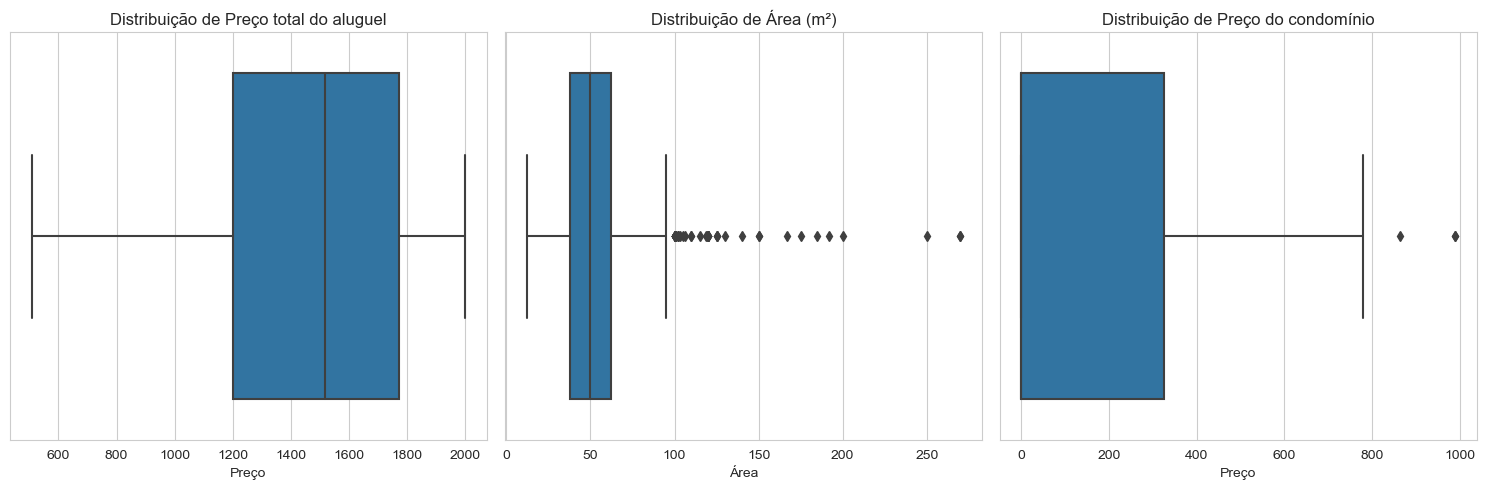

In [89]:
# Configura o estilo do seaborn
sns.set_style("whitegrid")

# Cria uma figura e eixos para os subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plota o primeiro gráfico
sns.boxplot(x=precoAluguelImoveisSP_df["total (R$)"], ax=axs[0])
axs[0].set_title('Distribuição de Preço total do aluguel')
axs[0].set_xlabel('Preço')

# Plota o segundo gráfico
sns.boxplot(x=precoAluguelImoveisSP_df["area"], ax=axs[1])
axs[1].set_title('Distribuição de Área (m²)')
axs[1].set_xlabel('Área')

# Plota o terceiro gráfico
sns.boxplot(x=precoAluguelImoveisSP_df["hoa (R$)"], ax=axs[2])
axs[2].set_title('Distribuição de Preço do condomínio')
axs[2].set_xlabel('Preço')

# Ajusta o layout para evitar sobreposição
plt.tight_layout()

# Mostra o gráfico
plt.show()

#### Grafico 1
* A distribuição dos dados do aluguel está dentro do esperado, com seu maior em 2000R$

#### Grafico 2
* A distribuição da área tem 75% dos dados abaixo de 62.5m², mas existem alguns imoveis acima de 100m² chegando até imoveis com mais de 250m²

#### Grafico 3
* 50% dos imoveis não pagam condominio (provavel que não estejam em condominios), entre 50% e 75% é possivel observar que o valor maximo de condominio é de 325R$

* Existem alguns valores de outliers onde o condominio chega a ser 49,5% (990,00 Reais) de um aluguel de 2000R$

# Responder as Perguntas

## Perguntas
- Permitir Animais de estimação aumenta o preço do aluguel?
- Permitir Animais de estimação tem relação com o tamanho do imóvel?

## Permitir Animais de estimação aumenta o preço do aluguel?

In [90]:
precoAluguelImoveisSP_df[["total (R$)", 'animal']].groupby('animal').mean()

,total (R$)
animal,
acept,1569.199143
not acept,1318.655882


Existe uma diferença na média, mas não é suficiente para responder a pergunta

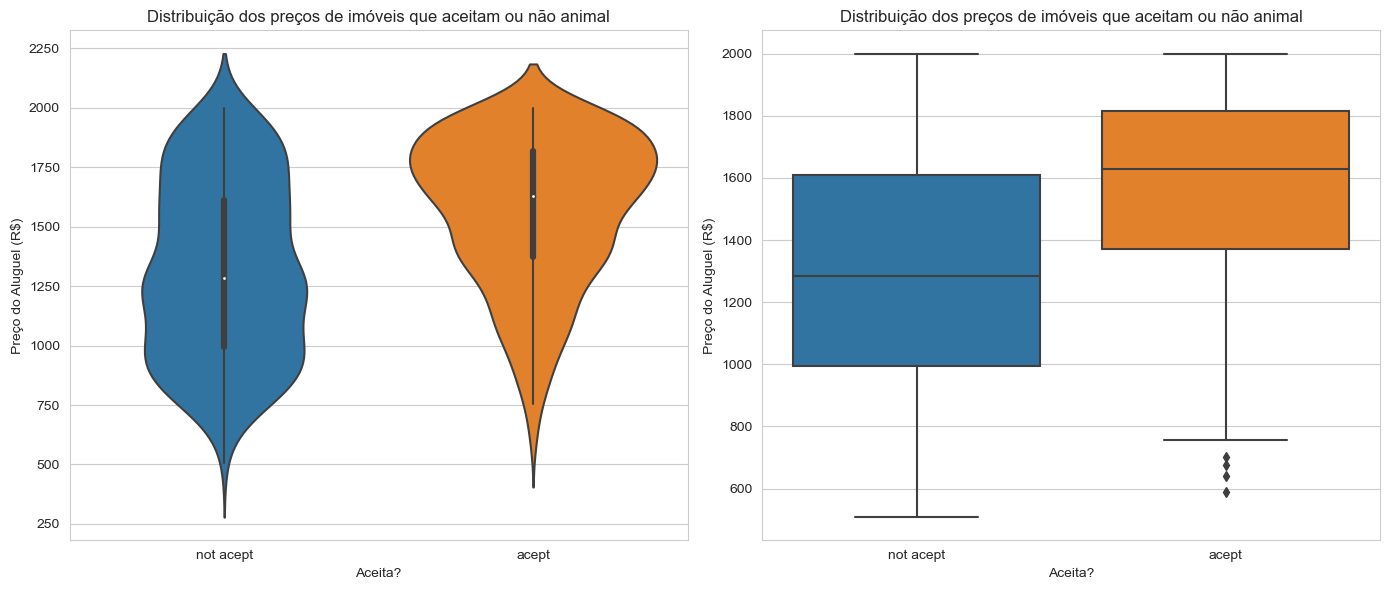

In [91]:
# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotando o gráfico de violino no primeiro subplot
sns.violinplot(data=precoAluguelImoveisSP_df, x='animal', y='total (R$)', ax=axs[0])
axs[0].set_title('Distribuição dos preços de imóveis que aceitam ou não animal')
axs[0].set_xlabel('Aceita?')
axs[0].set_ylabel('Preço do Aluguel (R$)')

# Plotando o gráfico de caixa no segundo subplot
sns.boxplot(data=precoAluguelImoveisSP_df, x='animal', y='total (R$)', ax=axs[1])
axs[1].set_title('Distribuição dos preços de imóveis que aceitam ou não animal')
axs[1].set_xlabel('Aceita?')
axs[1].set_ylabel('Preço do Aluguel (R$)')

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

É possivel perceber que em imoveis de menor preço existem mais imóveis que não permitem animais do que imóveis que permitem, mas quando esse valor se aproxima de 2000R$, os papeis se invertem, então observa-se que quando o aluguel vai ficando maior a tendência de aceitar animais é maior também.

#### Imóveis mais caros tendem a ter um maior aceite de animais

## Permitir Animais de estimação tem relação com o tamanho do imóvel?

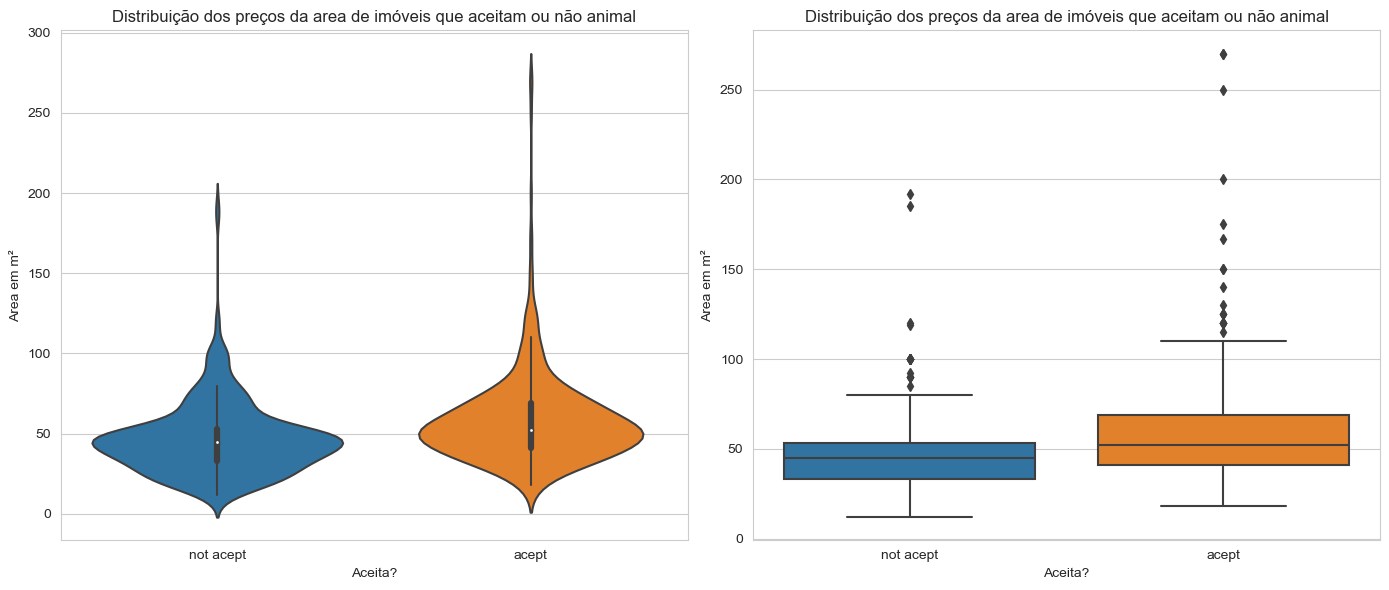

In [93]:

# Criando a figura e os subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plotando o gráfico de violino no primeiro subplot
sns.violinplot(data=precoAluguelImoveisSP_df, x='animal', y='area', ax=axs[0])
axs[0].set_title('Distribuição dos preços da area de imóveis que aceitam ou não animal')
axs[0].set_xlabel('Aceita?')
axs[0].set_ylabel('Area em m²')

# Plotando o gráfico de caixa no segundo subplot
sns.boxplot(data=precoAluguelImoveisSP_df, x='animal', y='area', ax=axs[1])
axs[1].set_title('Distribuição dos preços da area de imóveis que aceitam ou não animal')
axs[1].set_xlabel('Aceita?')
axs[1].set_ylabel('Area em m²')

# Ajustando o layout
plt.tight_layout()

# Exibindo os gráficos
plt.show()

É possivel ver uma tendência sim, que ao aumentar a área do imóvel, a permissão para animais 